**NLP (Word2Vec: CBOW & Skip-Gram)**

**What we learn today:**

- CBOW (Continuous Bag of Words) → Predict target word from context words.  
- Skip-Gram → Predict context words from target word.  
- Difference, examples, and small implementation.  


**CBOW vs Skip-Gram Explained**

**1. CBOW (Continuous Bag of Words)**  
- Goal: Predict the **target word** based on its surrounding **context words**.  
- Example: Sentence → "I live in India"  
  - Context = ["I", "in", "India"]  
  - Target = "live"  
- The model tries to guess **“live”** from the given context words.  
- Works well for **frequent words**, and training is **fast**.  

**2. Skip-Gram**  
- Goal: Predict the **context words** given the **target word**.  
- Example: Sentence → "I live in India"  
  - Target = "live"  
  - Context = ["I", "in", "India"]  
- The model tries to guess **["I", "in", "India"]** from the word **“live”**.  
- Better for **rare words**, but training is **slower**.  


**3. Key Difference**
- **CBOW → context → target word**  
- **Skip-Gram → target word → context**  



**4. Intuition**
- CBOW is like: *“Given the surrounding words, what word fits in the blank?”*  
- Skip-Gram is like: *“Given this word, what are the nearby words?”*  

    
**5. In Practice (Word2Vec)**
- Both CBOW and Skip-Gram learn **word embeddings** (dense vectors).  
- You can switch between them in Gensim with `sg=0` (CBOW) and `sg=1` (Skip-Gram).  


# Example Corpus
We’ll use a small text corpus for demonstration.

In [2]:
corpus = [
    ["india", "is", "a", "country"],
    ["delhi", "is", "the", "capital", "of", "india"],
    ["fruits", "like", "apple", "and", "mango"],
    ["england", "and", "uk", "are", "related"],
    ["bharat", "is", "another", "name", "for", "india"]
]


# Train CBOW Model  

CBOW → Input = context words, Output = target word.  
Faster, works better with frequent words.

In [3]:
from gensim.models import Word2Vec

# CBOW (sg=0)
cbow_model = Word2Vec(sentences=corpus, vector_size=50, window=3, min_count=1, sg=0)

print("Vector for 'india' (CBOW):\n", cbow_model.wv["india"])
print("\nMost similar to 'india' (CBOW):", cbow_model.wv.most_similar("india"))

Vector for 'india' (CBOW):
 [-1.0724545e-03  4.7286271e-04  1.0206699e-02  1.8018546e-02
 -1.8605899e-02 -1.4233618e-02  1.2917745e-02  1.7945977e-02
 -1.0030856e-02 -7.5267432e-03  1.4761009e-02 -3.0669428e-03
 -9.0732267e-03  1.3108104e-02 -9.7203208e-03 -3.6320353e-03
  5.7531595e-03  1.9837476e-03 -1.6570430e-02 -1.8897636e-02
  1.4623532e-02  1.0140524e-02  1.3515387e-02  1.5257311e-03
  1.2701781e-02 -6.8107317e-03 -1.8928028e-03  1.1537147e-02
 -1.5043275e-02 -7.8722071e-03 -1.5023164e-02 -1.8600845e-03
  1.9076237e-02 -1.4638334e-02 -4.6675373e-03 -3.8754821e-03
  1.6154874e-02 -1.1861792e-02  9.0324880e-05 -9.5074680e-03
 -1.9207101e-02  1.0014586e-02 -1.7519170e-02 -8.7836506e-03
 -7.0199967e-05 -5.9236289e-04 -1.5322480e-02  1.9229487e-02
  9.9641159e-03  1.8466286e-02]

Most similar to 'india' (CBOW): [('bharat', 0.2705654501914978), ('england', 0.2105751782655716), ('for', 0.16704080998897552), ('mango', 0.15019890666007996), ('the', 0.13204392790794373), ('and', 0.1267007

# Train Skip-Gram Model  

Skip-Gram → Input = target word, Output = context words.  
Slower, but captures rare words better.


In [4]:
# Skip-Gram (sg=1)
skipgram_model = Word2Vec(sentences=corpus, vector_size=50, window=3, min_count=1, sg=1)

print("Vector for 'india' (Skip-Gram):\n", skipgram_model.wv["india"])
print("\nMost similar to 'india' (Skip-Gram):", skipgram_model.wv.most_similar("india"))

Vector for 'india' (Skip-Gram):
 [-1.0724545e-03  4.7286271e-04  1.0206699e-02  1.8018546e-02
 -1.8605899e-02 -1.4233618e-02  1.2917745e-02  1.7945977e-02
 -1.0030856e-02 -7.5267432e-03  1.4761009e-02 -3.0669428e-03
 -9.0732267e-03  1.3108104e-02 -9.7203208e-03 -3.6320353e-03
  5.7531595e-03  1.9837476e-03 -1.6570430e-02 -1.8897636e-02
  1.4623532e-02  1.0140524e-02  1.3515387e-02  1.5257311e-03
  1.2701781e-02 -6.8107317e-03 -1.8928028e-03  1.1537147e-02
 -1.5043275e-02 -7.8722071e-03 -1.5023164e-02 -1.8600845e-03
  1.9076237e-02 -1.4638334e-02 -4.6675373e-03 -3.8754821e-03
  1.6154874e-02 -1.1861792e-02  9.0324880e-05 -9.5074680e-03
 -1.9207101e-02  1.0014586e-02 -1.7519170e-02 -8.7836506e-03
 -7.0199967e-05 -5.9236289e-04 -1.5322480e-02  1.9229487e-02
  9.9641159e-03  1.8466286e-02]

Most similar to 'india' (Skip-Gram): [('bharat', 0.2705654501914978), ('england', 0.21058686077594757), ('for', 0.16704080998897552), ('mango', 0.1502009928226471), ('the', 0.13204392790794373), ('and',

# Visualization with PCA
We reduce embeddings to 2D and plot them.


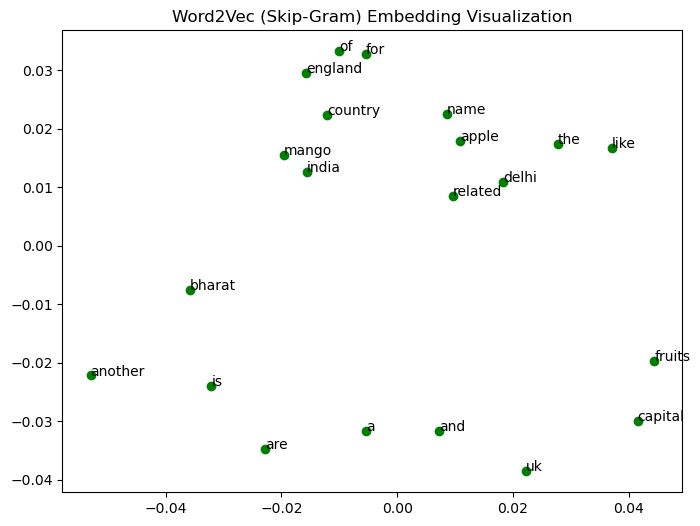

In [5]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Use Skip-Gram vectors for visualization
words = list(skipgram_model.wv.key_to_index.keys())
word_vectors = skipgram_model.wv[words]

pca = PCA(n_components=2)
reduced_vectors = pca.fit_transform(word_vectors)

plt.figure(figsize=(8,6))
plt.scatter(reduced_vectors[:,0], reduced_vectors[:,1], c='green')

for i, word in enumerate(words):
    plt.annotate(word, xy=(reduced_vectors[i,0], reduced_vectors[i,1]))

plt.title("Word2Vec (Skip-Gram) Embedding Visualization")
plt.show()

# Key Insights
- CBOW → Predicts target from context, faster, frequent words.  
- Skip-Gram → Predicts context from target, better for rare words.  
- Both create **word embeddings** that capture meaning.  

## Real-World Applications:
- CBOW → Large datasets (e.g., News, Wikipedia).  
- Skip-Gram → Domain-specific tasks (e.g., Medical, Legal).  
- Used in **Search engines, Chatbots, Recommendation systems, LLMs**.  


# Recap: NLP Fundamentals  

Over the past few sessions, we explored the foundations of **Natural Language Processing (NLP)**.  
Here’s the journey in short:


## Text Preprocessing

- Tokenization, Stopwords removal, Lemmatization, Stemming.  
- Converting raw text into a clean format for ML/NLP tasks.  

## Text Representation

- Bag of Words (BoW).  
- TF-IDF (Term Frequency–Inverse Document Frequency).  
- Learned how frequency-based methods convert text into numerical vectors.  

## Word Embeddings Basics

- Difference between One-Hot Encoding & Embeddings.  
- Why embeddings capture **semantic meaning** while dummy variables don’t.  

## Word2Vec

- Trained Word2Vec models on small corpora.  
- Understood context-based word similarity (e.g., *king – man + woman = queen*).  
- PCA visualization of embeddings.  

## BoW vs TF-IDF vs Word2Vec

- Compared frequency-based and context-based methods.  
- Highlighted how Word2Vec learns meaning instead of just counting words.  

## CBOW & Skip-Gram

- **CBOW (Continuous Bag of Words):** Predicts target word from context → faster, better for frequent words.  
- **Skip-Gram:** Predicts context from target → slower, better for rare words.  
- Visualized embeddings with PCA.  

**Key Takeaways**

- **BoW** → Simple, but ignores meaning & order.  
- **TF-IDF** → Better, highlights important words.  
- **Word2Vec** → Learns true semantic relationships.  
- **CBOW vs Skip-Gram** → Tradeoff between speed & rare-word performance.  

**Real-World Applications**
    
- Text Classification (spam detection, sentiment analysis).  
- Semantic Search & Information Retrieval.  
- Chatbots & Virtual Assistants.  
- Recommendation Systems.  
- Foundation for **LLMs (Large Language Models)**.  
